# Introduction
- Models developed: 
    - SVM, Decision Tree (Ray)
    - KNN, Neural Network (Jamie)

# Data Preprocessing

# ML models

### SVM

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# read train data
meta_train_data = pd.read_csv('Data/train/train_metadata.csv')
color_histogram_train = pd.read_csv('Data/train/Features/color_histogram.csv')
hog_pca_train = pd.read_csv('Data/train/Features/hog_pca.csv')
additional_features_train = pd.read_csv('Data/train/Features/additional_features.csv')

In [113]:
dfs = [color_histogram_train, hog_pca_train] 

dfs = [df.drop(columns='image_path') for df in dfs]
# Concatenate them along columns
data_train = pd.concat(dfs, axis=1)

data_train.index = meta_train_data["id"]

In [114]:
X_data = data_train
Y_data = meta_train_data["ClassId"]

# split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(
    X_data, Y_data, 
    test_size=0.2,   # Proportion of the data to include in the test split
    random_state=69, # Set a seed for reproducibility
    stratify=Y_data       # Optional: ensures that class distributions are similar in both train and test sets
)

In [99]:
SVMModel = SVC(kernel="linear")
SVMModel.fit(X_train, y_train)

SVC(kernel='linear')

Accuracy: 84.61%


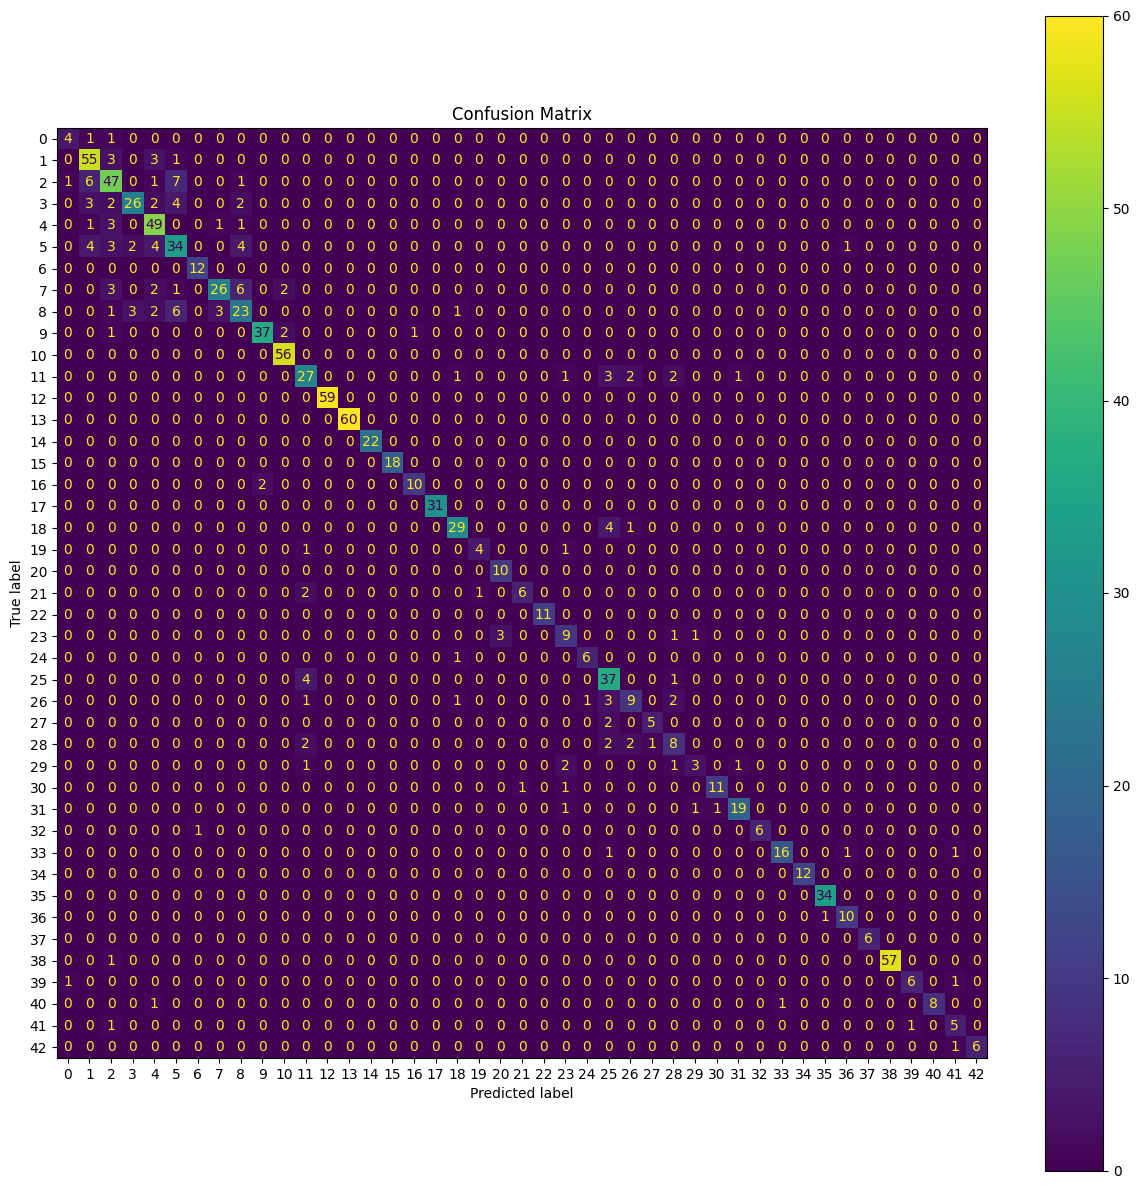

In [100]:
y_pred = SVMModel.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# display confusion matrix
cm = confusion_matrix(y_test, y_pred)
matrix = ConfusionMatrixDisplay(cm)
matrix.plot()
plt.gcf().set_size_inches(15, 15)
plt.title('Confusion Matrix')
plt.show()


In [101]:
 # load test data
meta_test_data = pd.read_csv('Data/test/test_metadata.csv', sep=',')
color_histogram_test = pd.read_csv('Data/test/Features/color_histogram.csv', sep=',')
hog_pca_test = pd.read_csv('Data/test/Features/hog_pca.csv', sep=',')
additional_features_test = pd.read_csv('Data/test/Features/additional_features.csv', sep=',')

dfs = [color_histogram_test, hog_pca_test, additional_features_test]


dfs = [df.drop(columns='image_path') for df in dfs]
# Concatenate them along columns
data_test = pd.concat(dfs, axis=1)

# Set the index to meta_train_data["id"]
data_test.index = meta_test_data["id"]

In [94]:
predictions = SVMModel.predict(data_test)

# Create DataFrame with index as 'id' and prediction as 'ClassId'
result_df = pd.DataFrame({
    'id': data_test.index,        # Assumes data_test has the correct index
    'ClassId': predictions
})

# Write to CSV
result_df.to_csv("result.csv", index=False)

## Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [102]:
RFModel = RandomForestClassifier(
    n_estimators=100,     # Number of trees
    max_depth=None,       # Limit tree depth (optional)
    random_state=42       # For reproducibility
)

RFModel.fit(X_train, y_train)
y_pred = RFModel.predict(X_test)

Accuracy: 78.78%


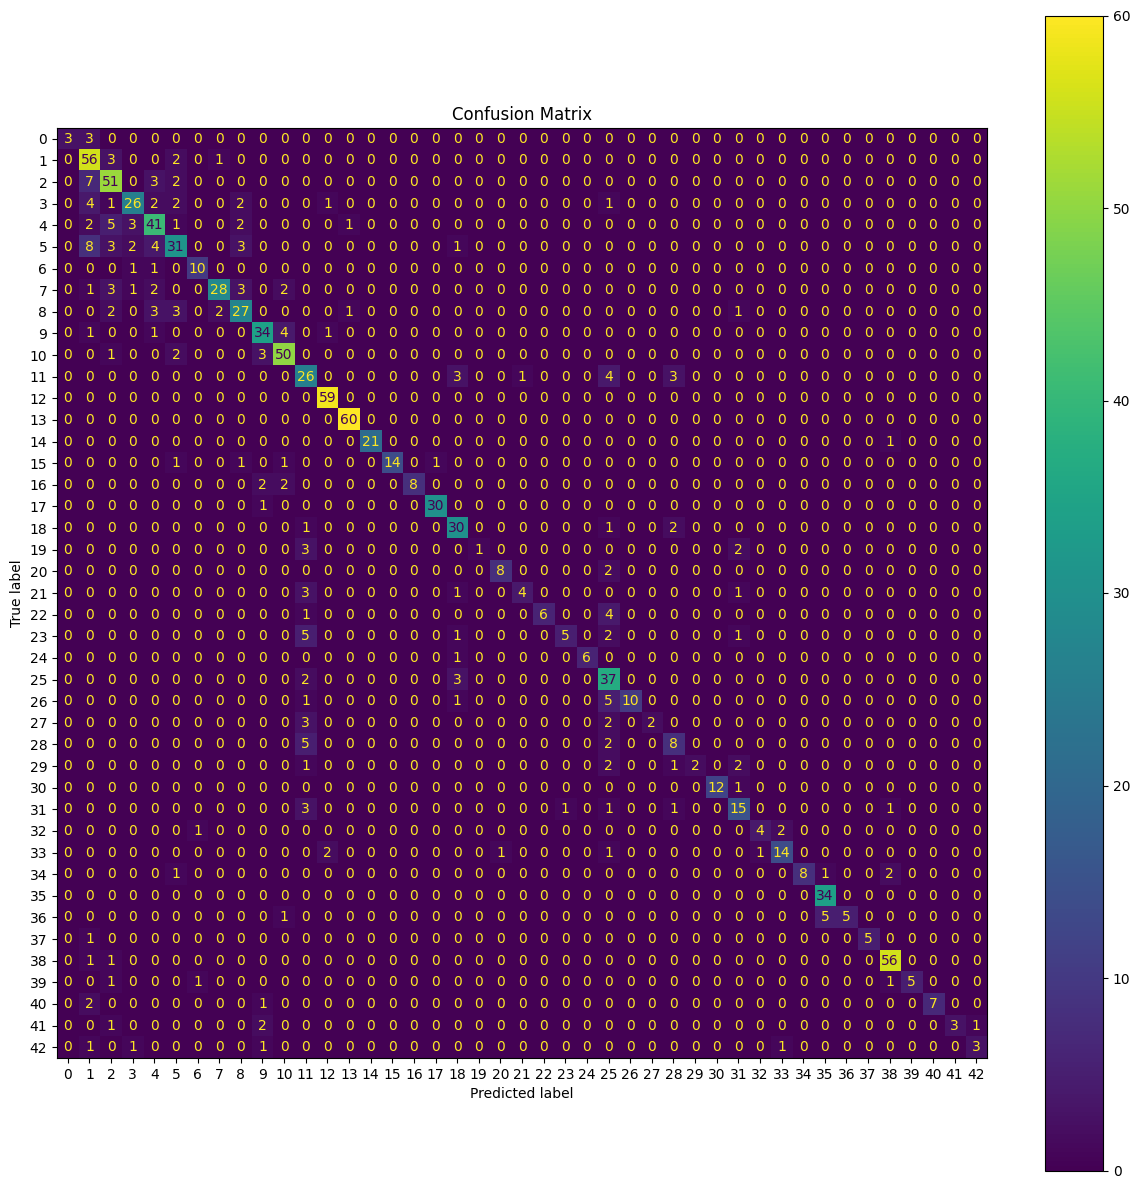

In [75]:
y_pred = RFModel.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# display confusion matrix
cm = confusion_matrix(y_test, y_pred)
matrix = ConfusionMatrixDisplay(cm)
matrix.plot()
plt.gcf().set_size_inches(15, 15)
plt.title('Confusion Matrix')
plt.show()


In [115]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(probability=True, random_state=42) 
knn = KNeighborsClassifier(n_neighbors=5)

voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('svm', svm), ('knn', knn)], 
    voting='soft'  # 'hard' for majority vote, 'soft' for probability averaging
)
# Train Voting Classifier
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('svm', SVC(probability=True, random_state=42)),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [116]:
y_pred = voting_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# display confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# matrix = ConfusionMatrixDisplay(cm)
# matrix.plot()
# plt.gcf().set_size_inches(15, 15)
# plt.title('Confusion Matrix')
# plt.show()


Accuracy: 83.06%


In [117]:
 # load test data
meta_test_data = pd.read_csv('Data/test/test_metadata.csv', sep=',')
color_histogram_test = pd.read_csv('Data/test/Features/color_histogram.csv', sep=',')
hog_pca_test = pd.read_csv('Data/test/Features/hog_pca.csv', sep=',')
additional_features_test = pd.read_csv('Data/test/Features/additional_features.csv', sep=',')

dfs = [color_histogram_test, hog_pca_test]


dfs = [df.drop(columns='image_path') for df in dfs]
# Concatenate them along columns
data_test = pd.concat(dfs, axis=1)

# Set the index to meta_train_data["id"]
data_test.index = meta_test_data["id"]


predictions = voting_clf.predict(data_test)

# Create DataFrame with index as 'id' and prediction as 'ClassId'
result_df = pd.DataFrame({
    'id': data_test.index,        # Assumes data_test has the correct index
    'ClassId': predictions
})

# Write to CSV
result_df.to_csv("result.csv", index=False)